In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import kaleido
from IPython.display import Image
import networkx as nx
import seaborn as sns

In [10]:
DATASET_PATH = '../0_data_files/'
IMAGE_PATH = "../2_images/"
file_path = DATASET_PATH + 'sankey_assignment.csv'

print(f"Attempting to read file from: {file_path}")

networks_df = pd.read_csv(DATASET_PATH + 'networks_assignment.csv')
networks_df.tail()

Attempting to read file from: ../0_data_files/sankey_assignment.csv


,LABELS,N,D,F,I,S,AUT,BEL,BIH,BGR,...,SVK,SVN,ESP,CHE,TUR,UKR,GBR,AUS,HKG,ASU
0,D,3,0,3,1,3,0,0,0,0,...,0,0,1,0,0,0,2,0,0,1
1,F,1,2,0,1,1,0,1,0,0,...,1,1,2,1,0,0,2,0,0,0
2,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,0,2,2,1,2,0,0,0,0,...,0,0,1,0,0,0,2,1,0,1
4,S,5,4,3,3,0,2,2,2,2,...,0,0,2,2,2,2,3,1,1,1


Network graph saved as: ../2_images/network_graph.png


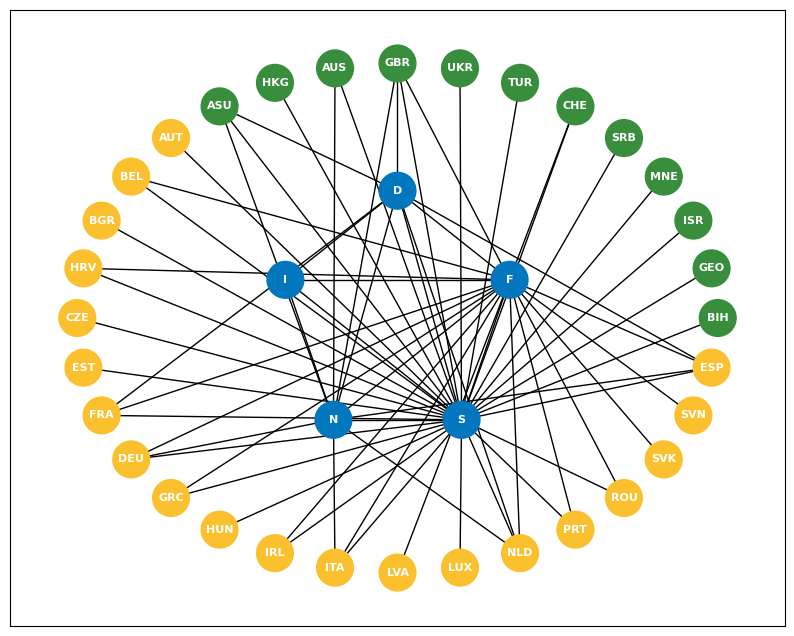

In [13]:
def get_network_weight(source, destination):
    global networks_df
    return networks_df.loc[networks_df['LABELS'] == source, destination].values[0]

def build_edge_list(edge_store, sources, destinations):
    for src in sources:
        for dst in destinations:
            connection_weight = get_network_weight(src, dst)
            if connection_weight > 0:
                edge_store.append((src, dst))

primary_nodes = ['D', 'F', 'I', 'N', 'S']
secondary_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'ASU']
tertiary_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 
                  'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

total_nodes = primary_nodes + secondary_nodes + tertiary_nodes

edge_internal, edge_external, edge_auxiliary = [], [], []

# Generate edge mappings
build_edge_list(edge_internal, primary_nodes, primary_nodes)
build_edge_list(edge_external, primary_nodes, secondary_nodes)
build_edge_list(edge_auxiliary, primary_nodes, tertiary_nodes)

total_edges = edge_internal + edge_external + edge_auxiliary

network_graph = nx.Graph()
network_graph.add_nodes_from(total_nodes)
network_graph.add_edges_from(total_edges)

node_positions = nx.circular_layout(network_graph.subgraph(secondary_nodes + tertiary_nodes), center=(0, 0), scale=1.0)
node_positions.update({
    'D': np.array([0, 0.5]),
    'F': np.array([0.35, 0.15]),
    'I': np.array([-0.35, 0.15]),
    'N': np.array([-0.20, -0.4]),
    'S': np.array([0.20, -0.4])
})

node_color_mapping = [
    (set_group, color) for set_group, color in zip(
        map(set, [primary_nodes, secondary_nodes, tertiary_nodes]), 
        ['#0277BD', '#388E3C', '#FBC02D']
    )
]

assigned_colors = [
    color for (set_group, color) in node_color_mapping for node in total_nodes if node in set_group
]

import os

# Define the save path
IMAGE_PATH = "../2_images/"
os.makedirs(IMAGE_PATH, exist_ok=True)  # Ensure directory exists
image_filename = IMAGE_PATH + "network_graph.png"

plt.figure(figsize=(10, 8))

# Render the network graph
nx.draw_networkx_nodes(network_graph, node_positions, node_color=assigned_colors, node_size=700)
nx.draw_networkx_labels(network_graph, node_positions, font_weight='bold', font_size=8, font_color='white')
nx.draw_networkx_edges(network_graph, node_positions, arrows=False, edge_color='black')

# Save the figure before showing it
plt.savefig(image_filename, dpi=300, bbox_inches='tight')
print(f"Network graph saved as: {image_filename}")

# Show the graph
plt.show()



